<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_2_Local_and_Global_alignment_for_COX_1_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
# -----------------------------------------------------------
# 🧬 BIOINFORMATICS PROJECT: COX1 GENE FETCH, BLAST & ALIGNMENT
# -----------------------------------------------------------

from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

# --- Step 1: Fetch sequences directly from NCBI ---
Entrez.email = "ajdeeksha.bt23@rvce.edu.in"  # REQUIRED by NCBI

sequence_ids = ["PX448095.1", "PX448063.1"]
fasta_files = []

for seq_id in sequence_ids:
    print(f"\n🔹 Fetching sequence: {seq_id} from NCBI...")
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()

    # Display details
    print(f"\nID: {record.id}")
    print(f"Name: {record.name}")
    print(f"Description: {record.description}")
    print(f"Number of features: {len(record.features)}")
    print(f"Sequence length: {len(record.seq)}")
    print(f"Sequence (first 100 bases): {record.seq[:100]}...\n")

    # Save FASTA for later use
    fasta_filename = f"{seq_id}.fasta"
    SeqIO.write(record, fasta_filename, "fasta")
    fasta_files.append(fasta_filename)
    print(f"✅ Saved as {fasta_filename}")

# --- Step 2: Perform BLAST and display formatted alignment ---
for seq_id in sequence_ids:
    print(f"\n🧩 Performing BLAST for sequence ID: {seq_id}")
    result_handle = NCBIWWW.qblast("blastn", "nt", seq_id)
    blast_records = NCBIXML.parse(result_handle)

    for blast_record in blast_records:
        print(f"\nQuery: {blast_record.query}")
        for alignment in blast_record.alignments[:1]:  # Show top 1 hits
            for hsp in alignment.hsps[:1]:  # Only first HSP for clarity
                print("\nAlignment:", alignment.title)
                print(f"  Length: {alignment.length}")
                print(f"  E-value: {hsp.expect}")
                print(f"  Query start: {hsp.query_start}, Query end: {hsp.query_end}")
                print(f"  Subject start: {hsp.sbjct_start}, Subject end: {hsp.sbjct_end}")
                print(f"  Score: {hsp.score}")
                print(f"  Identities: {hsp.identities}")
                print(f"  Gaps: {hsp.gaps}")
                print(f"  Query: {hsp.query[:75]}...")
                print(f"  Match: {hsp.match[:75]}...")
                print(f"  Sbjct: {hsp.sbjct[:75]}...")
                print("-" * 80)

    result_handle.close()

# --- Step 3: Simple sequence comparison ---
def read_fasta(file_path):
    """Reads a FASTA file and returns the sequence string."""
    record = SeqIO.read(file_path, "fasta")
    return str(record.seq)

seq1 = read_fasta(fasta_files[0])
seq2 = read_fasta(fasta_files[1])

def simple_sequence_comparison(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    """Performs a basic character-by-character alignment."""
    score = 0
    aligned_seq1 = ""
    aligned_seq2 = ""
    i, j = 0, 0

    while i < len(seq1) and j < len(seq2):
        if seq1[i] == seq2[j]:
            score += match_score
            aligned_seq1 += seq1[i]
            aligned_seq2 += seq2[j]
        else:
            score += mismatch_penalty
            aligned_seq1 += seq1[i]
            aligned_seq2 += seq2[j]
        i += 1
        j += 1

    while i < len(seq1):
        score += gap_penalty
        aligned_seq1 += seq1[i]
        aligned_seq2 += '-'
        i += 1
    while j < len(seq2):
        score += gap_penalty
        aligned_seq1 += '-'
        aligned_seq2 += seq2[j]
        j += 1

    return score, aligned_seq1, aligned_seq2

# --- Step 4: Run the alignment ---
score, aligned_seq1, aligned_seq2 = simple_sequence_comparison(seq1, seq2)

print("\n--- SIMPLE SEQUENCE COMPARISON ---")
print(f"Sequence 1 ID: {sequence_ids[0]}")
print(f"Sequence 2 ID: {sequence_ids[1]}")
print(f"Alignment Score: {score}")
print(f"\nAligned Sequence 1 (first 100 bases): {aligned_seq1[:100]}...")
print(f"Aligned Sequence 2 (first 100 bases): {aligned_seq2[:100]}...")


🔹 Fetching sequence: PX448095.1 from NCBI...

ID: PX448095.1
Name: PX448095
Description: Mytella strigata isolate CSN/FRM/ENN002 cytochrome c oxidase subunit I (COX1) gene, partial cds; mitochondrial
Number of features: 3
Sequence length: 597
Sequence (first 100 bases): CGTATTCAATTATCCCATCCTGGTGGTAGATTTTTAAAAAATGAAAATTTGTACAACGTGGTGGTTACTACACATGCATTAGTAATAATTTTTTTTGCTG...

✅ Saved as PX448095.1.fasta

🔹 Fetching sequence: PX448063.1 from NCBI...

ID: PX448063.1
Name: PX448063
Description: Mytella strigata isolate CSN/FRM/ENN002 cytochrome c oxidase subunit I (COX1) gene, partial cds; mitochondrial
Number of features: 3
Sequence length: 636
Sequence (first 100 bases): TTAATAGGAAGAAGGTTGAGATTGATTATCCGTATCCAACTTTCCCACCCTGGAGGAAATTTTCTAAAAAACGAAAGCTTGTATAATGTAGTGGTTACTA...

✅ Saved as PX448063.1.fasta

🧩 Performing BLAST for sequence ID: PX448095.1

Query: Mytella strigata isolate CSN/FRM/ENN002 cytochrome c oxidase subunit I (COX1) gene, partial cds; mitochondrial

Alignment: gi|30717318

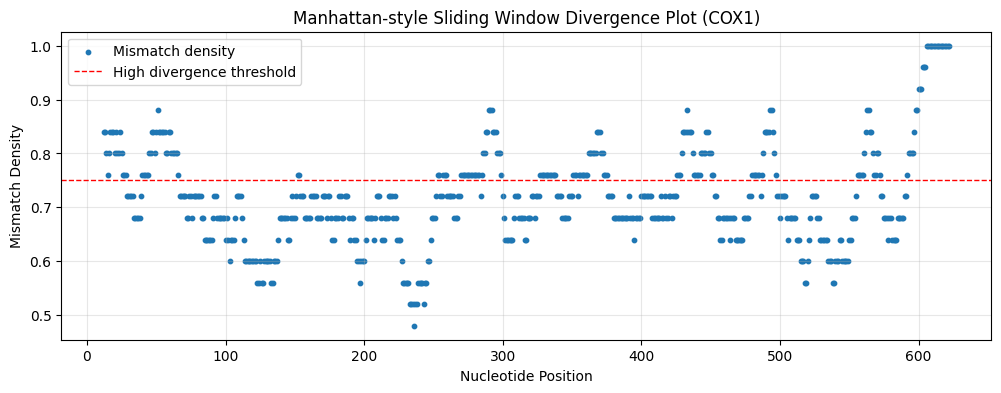

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sliding_window_manhattan(aligned_seq1, aligned_seq2, window_size=25):
    positions = []
    mismatch_density = []

    for i in range(0, len(aligned_seq1) - window_size):
        window1 = aligned_seq1[i:i+window_size]
        window2 = aligned_seq2[i:i+window_size]

        mismatches = sum(
            1 for a, b in zip(window1, window2)
            if a != b or a == '-' or b == '-'
        )

        positions.append(i + window_size // 2)
        mismatch_density.append(mismatches / window_size)

    # ---- PLOTTING STARTS HERE ----
    plt.figure(figsize=(12, 4))

    # Base Manhattan-style scatter plot
    plt.scatter(positions, mismatch_density, s=10, label="Mismatch density")

    # OPTIONAL 1: Threshold line (extra clear interpretation)
    plt.axhline(
        0.75,
        color='red',
        linestyle='--',
        linewidth=1,
        label='High divergence threshold'
    )

    plt.xlabel("Nucleotide Position")
    plt.ylabel("Mismatch Density")
    plt.title("Manhattan-style Sliding Window Divergence Plot (COX1)")
    plt.grid(alpha=0.3)

    # OPTIONAL 2: Legend (recommended if you add threshold)
    plt.legend()

    # Show the plot
    plt.show()

sliding_window_manhattan(aligned_seq1, aligned_seq2)